# 📌 Week 4 시계열 데이터 과제

- **구성:** 이론 + 실습  
- **이론:** 정규 세션 핵심 내용 기반 주관식 문제(총 2문제)
- **실습:** ARIMA & DLinear 모델 활용(총 4문제)
<br><br> 모르는 부분 혹은 문제에 오류가 있는 경우 편하게 연락해주세요:)

## 📖 이론
🔹 정규 세션에서 배운 핵심 개념을 바탕으로 한 **주관식 문제**입니다.  

**Q1**


- 시계열 데이터에서 추세와 계절성을 제거하면 정상성을 가지게 만들 수 있습니다. 이 때, 가법 모형과 승법 모형 각각에서 추세와 계절성을 추출하는 방법을 **간단하게** 서술해주세요.  <br><br>
참고: https://techblog-history-younghunjo1.tistory.com/81#google_vignette<br><br>

**A1**<br>
원본데이터가 일정하게 안정적인 그래프를 그린다면 '가법', 증가하거나 감소하는 형태를 띈다면 '승법'으로 선택하면 됨.

[가법 모델]<br>
추세:Trend = 원본 데이터 - (Seasonal + 불규칙)
<br>
계절성:Seasonal = 원본 데이터 - Trend
<br><br>
[승법 모델]<br>
추세:Trend = 원본 데이터 / (Seasonal * 불규칙)
<br>
계절성:Seasonal = 원본 데이터 / Trend

**Q2**

- AR(p) 및 MA(q) 모델을 차이점을 중심으로 설명해주세요.<br><br>

**A2**<br>

답:
- **AR(p)** 모델(AutoRegressive Model, 자기회귀 모델)
  - 현재 시점의 값이 이전 시점의 값들에 의해 결정됨.
  - 선형 회귀처럼 이전 값들의 선형 조합을 통해 예측
  - 시계열 데이터가 자기상관을 가질때 유용.
  - 단기적인 예측에 좋음.
- **MA(q)** 모델(Moving Average Model, 이동평균 모델)
  - 현재 시점의 값이 과거의 오차(백색 잡음)들의 선형 조합에 의해 결정
  - 과거 관측값이 아니라 과거의 충격(오차)들이 영향을 줌
  - 자기회귀 모델과 달리 오차(충격)들의 영향을 받아 변동성이 높음

## 💻 실습1 ARIMA  
🔹 모의 데이터를 활용한 **ARIMA** 모델 실습입니다. 주어진 데이터를 활용하여 코드 중간중간 주어진 문제에 답해주세요.


### 데이터 전처리

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd

# 데이터 로드
df = pd.read_csv("/content/drive/MyDrive/tobigs25_1/정규세션/ week4/data/DailyDelhiClimateTest.csv")
df_eval=pd.read_csv("/content/drive/MyDrive/tobigs25_1/정규세션/ week4/data/DailyDelhiClimateTrain.csv")

# 데이터 확인
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [8]:
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)

# 필요한 컬럼 선택 (meantemp)
df = df[["meantemp"]]

df_eval["date"] = pd.to_datetime(df_eval["date"])
df_eval.set_index("date", inplace=True)

# 필요한 컬럼 선택 (meantemp)
df_eval = df_eval[["meantemp"]]

df.head()

,meantemp
date,
2017-01-01,15.913043
2017-01-02,18.500000
2017-01-03,17.111111
2017-01-04,18.700000
2017-01-05,18.388889


### 정상성 확인

In [9]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# ADF 테스트 (단위근 검정) 수행
adf_result = adfuller(df["meantemp"])
adf_statistic, p_value = adf_result[0], adf_result[1]


# ADF 검정 결과 출력
adf_statistic, p_value

(np.float64(-1.096474275875619), np.float64(0.7164758731775932))

**Q1**

- 위 결과로부터 데이터가 정상성을 가지는지 답하고, 비정상성을 가진다면 어떤 처리를 할 수 있는지 **간단히** 서술해주세요,<br><br>

**A1**<br><br>
답:
- p-value가 0.716으로 0.05보다 크기때문에 귀무가설을 기각할 수 없다. 즉, 데이터는 정상성을 가지지 않는다.(비정상성)

- 데이터가 비정상성을 가지므로 정상성을 만들기 위해서는 차분(Differencing), 로그변환, box-cox변환 등의 방법을 적용할 수 있다.

In [10]:
# 차분 진행
df_diff = df.diff().dropna()

# ADF 테스트 (차분 후)
adf_result_diff = adfuller(df_diff["meantemp"])
adf_statistic_diff, p_value_diff = adf_result_diff[0], adf_result_diff[1]

adf_statistic_diff, p_value_diff

(np.float64(-12.035797595562196), np.float64(2.8053213689778235e-22))

### ARIMA 하이퍼 파라미터 결정

**Q2**

- 아래 ACF와 PACF Plot으로부터 ARIMA의 하이퍼파라미터인 p와 q를 몇으로 설정해야할지 그 숫자와 근거를 적어주세요. 이후 변수를 선언해주세요.<br><br>

**A2**<br>
- 실핀처럼 생긴 bar들이 있는데, 이게 파란색 상자 안에 들어가게 되면, 그때부터는 값이 통계적으로 significant하지 않다고 봄.

- p: 자기회귀(AR) 차수, 과거의 값을 얼마나 반영할 것인지 결정.
- d: 차분 차수, 데이터의 차분을 몇 번 할지 결정하여 비정상성을 제거.
- q: 이동평균(MA) 차수, 예측 오차를 얼마나 반영할지 결정.

p:1    
<br>
이유:lag1이후 모든 값이 유의 하지 않음. AR효과가 거의 없음.  
<br><br>

q: 1
<br>
이유:lag 1에서 유의한 값이 나타난 후, 빠르게 감소하고 대부분의 값이 유의하지 않음.

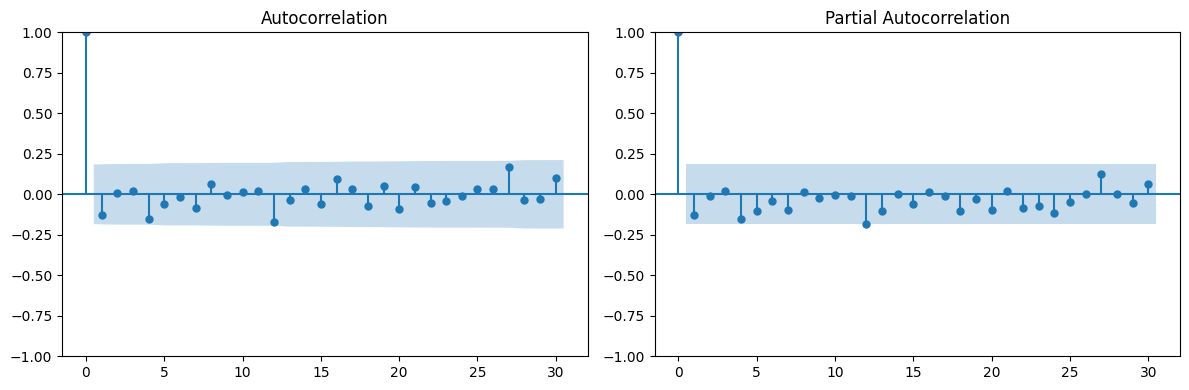

In [11]:
# ACF와 PACF 플롯
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sm.graphics.tsa.plot_acf(df_diff["meantemp"], lags=30, ax=axes[0])
sm.graphics.tsa.plot_pacf(df_diff["meantemp"], lags=30, ax=axes[1])

plt.tight_layout()
plt.show()


In [12]:
# 변수 선언

p=1
q=1

### ARIMA 학습

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


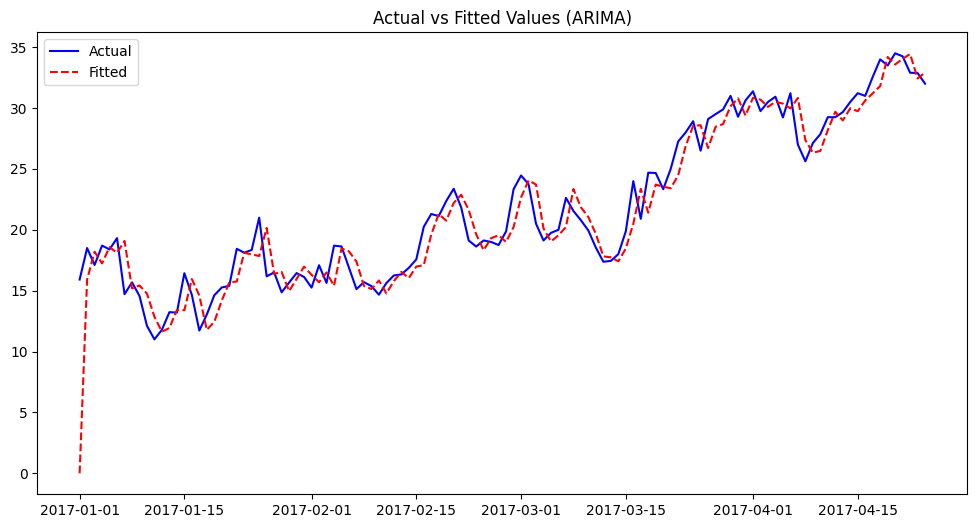

In [13]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df["meantemp"], order=(p, 1, q))
model_fit = model.fit()

# 예측 수행
df["fitted"] = model_fit.fittedvalues

# 실제값과 예측값 시각화
plt.figure(figsize=(12, 6))
plt.plot(df["meantemp"], label="Actual", color="blue")
plt.plot(df["fitted"], label="Fitted", color="red", linestyle="dashed")
plt.title("Actual vs Fitted Values (ARIMA)")
plt.legend()
plt.show()

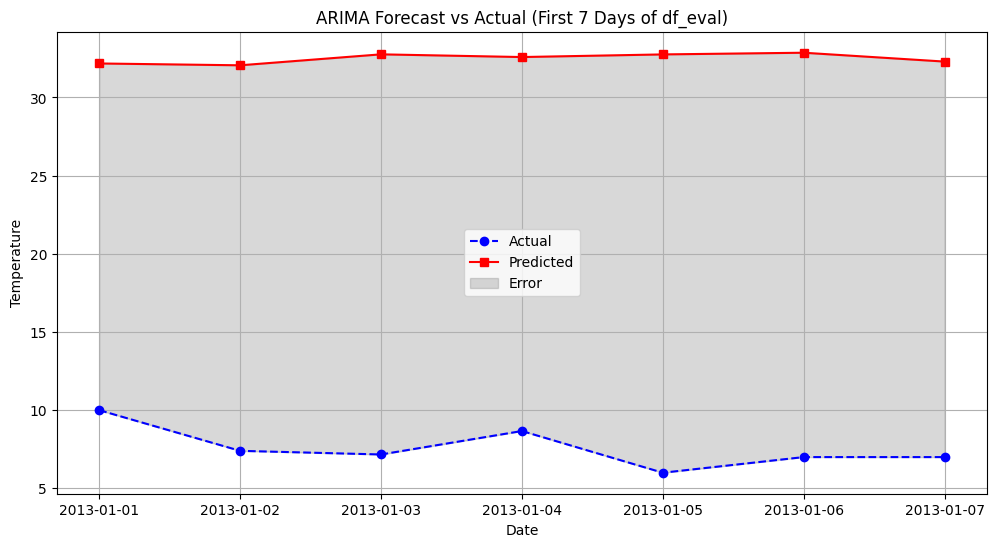

In [14]:
test_series = df_eval['meantemp'][:7]

forecast_steps = 7
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(12, 6))
plt.plot(test_series.index, test_series, label="Actual", linestyle="dashed", marker="o", color="blue")
plt.plot(test_series.index, forecast, label="Predicted", marker="s", color="red")
plt.fill_between(test_series.index, test_series, forecast, color="gray", alpha=0.3, label="Error")
plt.title("ARIMA Forecast vs Actual (First 7 Days of df_eval)")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.grid()
plt.show()

### (선택) AutoARIMA

아래는 자동으로 p,d,q 값을 계산해주는 auto_arima를 사용한 코드입니다.

In [4]:
!pip install pmdarima

In [5]:
from pmdarima import auto_arima

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [70]:
from pmdarima import auto_arima

stepwise_model = auto_arima(df["meantemp"],
                            start_p=0, max_p=5,
                            start_q=0, max_q=5,
                            seasonal=False,
                            trace=True,  # 최적화 과정 출력
                            error_action="ignore",
                            suppress_warnings=True)

# 최적의 (p, d, q) 값 출력
print(f"\n Optimal (p, d, q): {stepwise_model.order}\n")

# 최적의 파라미터로 ARIMA 모델 학습
p, d, q = stepwise_model.order
model = ARIMA(df["meantemp"], order=(p, d, q))
model_fit = model.fit()

# 예측값 저장
df["fitted"] = model_fit.fittedvalues


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
test_series = df_eval['meantemp'][:7]

forecast_steps = 7
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(12, 6))
plt.plot(test_series.index, test_series, label="Actual", linestyle="dashed", marker="o", color="blue")
plt.plot(test_series.index, forecast, label="Predicted", marker="s", color="red")
plt.fill_between(test_series.index, test_series, forecast, color="gray", alpha=0.3, label="Error")
plt.title("ARIMA Forecast vs Actual (First 7 Days of df_eval)")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.grid()
plt.show()

## 💻 실습2 Dlinear

In [59]:
import pandas as pd
import numpy as np


# 데이터 로드
train_df = pd.read_csv('/content/drive/MyDrive/tobigs25_1/정규세션/ week4/data/DailyDelhiClimateTest.csv')
test_df = pd.read_csv('/content/drive/MyDrive/tobigs25_1/정규세션/ week4/data/DailyDelhiClimateTrain.csv')

# 날짜 컬럼을 제외한 데이터만 사용
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])
train_df.set_index('date', inplace=True)
test_df.set_index('date', inplace=True)

features = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
train_values = train_df[features].values.astype(np.float32)
test_values = test_df[features].values.astype(np.float32)

**Q3**

- 30일간의 날씨 데이터를 이용해 7일 동안의 온도, 습도, 풍속, 대기압을 예측하고자 합니다. 아래 코드의 빈칸을 채워주세요. <br><br>


In [60]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset, DataLoader

# Sliding Window 전처리
def create_sequences(data, seq_len, pred_len):
    X, y = [], []
    for i in range(len(data) - seq_len - pred_len):
        X.append(data[i:i+seq_len]) # 빈칸을 채워주세요
        y.append(data[i+seq_len:i+seq_len+pred_len])  # 빈칸을 채워주세요
    return np.array(X), np.array(y)


seq_len =30 #빈칸을 채워주세요(예측을 위해 사용할 time step 수)
pred_len =7 # 빈칸을 채워주세요(실제 예측할 time step 수)
X_train, y_train = create_sequences(train_values, seq_len, pred_len)


# PyTorch Dataset 정의
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

train_dataset = TimeSeriesDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

<ipython-input-60-8f2ae5d237b8>:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.X = torch.tensor(X, dtype=torch.float32)
<ipython-input-60-8f2ae5d237b8>:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y = torch.tensor(y, dtype=torch.float32)


In [61]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

# Dlinear 모델 선언

# 이동 평균을 이용한 추세 추출
class moving_avg(nn.Module):

    def __init__(self, kernel_size, stride):
        super(moving_avg, self).__init__()
        self.kernel_size = kernel_size # Kernel: 이동 평균을 계산하기 위한 시간대의 길이
        self.avg = nn.AvgPool1d(kernel_size=kernel_size, stride=stride, padding=0)

    def forward(self, x):
        # padding on the both ends of time series
        front = x[:, 0:1, :].repeat(1, (self.kernel_size - 1) // 2, 1)
        end = x[:, -1:, :].repeat(1, (self.kernel_size - 1) // 2, 1)
        x = torch.cat([front, x, end], dim=1)
        x = self.avg(x.permute(0, 2, 1))
        x = x.permute(0, 2, 1)
        return x

# 시계열 분해
class series_decomp(nn.Module):
    """
    Series decomposition block
    """
    def __init__(self, kernel_size):
        super(series_decomp, self).__init__()
        self.moving_avg = moving_avg(kernel_size, stride=1)

    def forward(self, x):
        moving_mean = self.moving_avg(x)
        res = x - moving_mean # 데이터에서 추세를 빼면 계절성 부분만 남음
        return res, moving_mean

# 모델
class Model(nn.Module):
    def __init__(self, configs):
        super(Model, self).__init__()
        self.seq_len = configs['seq_len']
        self.pred_len = configs['pred_len']
        self.individual = configs['individual'] # 특성마다 다른 선형 회귀를 적용할지 여부
        self.channels = configs['enc_in'] # 입력 및 출력되는 특성 수

        # Decomposition Kernel Size
        kernel_size = configs['kernel_size'] # Kernel: 이동 평균을 계산하기 위한 시간대의 길이
        self.decompsition = series_decomp(kernel_size)

        if self.individual:
            self.Linear_Seasonal = nn.ModuleList()
            self.Linear_Trend = nn.ModuleList()

            for i in range(self.channels):
                self.Linear_Seasonal.append(nn.Linear(self.seq_len, self.pred_len))
                self.Linear_Trend.append(nn.Linear(self.seq_len, self.pred_len))
        else:
            self.Linear_Seasonal = nn.Linear(self.seq_len, self.pred_len)
            self.Linear_Trend = nn.Linear(self.seq_len, self.pred_len)

    def forward(self, x):
        seasonal_init, trend_init = self.decompsition(x)
        seasonal_init, trend_init = seasonal_init.permute(0, 2, 1), trend_init.permute(0, 2, 1)

        if self.individual:
            seasonal_output = torch.zeros([seasonal_init.size(0), seasonal_init.size(1), self.pred_len], dtype=seasonal_init.dtype).to(seasonal_init.device)
            trend_output = torch.zeros([trend_init.size(0), trend_init.size(1), self.pred_len], dtype=trend_init.dtype).to(trend_init.device)

            for i in range(self.channels):
                seasonal_output[:, i, :] = self.Linear_Seasonal[i](seasonal_init[:, i, :])
                trend_output[:, i, :] = self.Linear_Trend[i](trend_init[:, i, :])
        else:
            seasonal_output = self.Linear_Seasonal(seasonal_init)
            trend_output = self.Linear_Trend(trend_init)

        x = seasonal_output + trend_output
        return x.permute(0, 2, 1)

In [68]:
print(f"Kernel Size: {configs['kernel_size']}")
print(f"Learning Rate: {optimizer.param_groups[0]['lr']}")
print(f"Individual: {configs['individual']}")
print(f"Epochs: {num_epochs}")


Kernel Size: 17
Learning Rate: 0.001
Individual: True
Epochs: 50


**Q4**

- Dlinear 모델은 kernel, learning rate, individual, epoch 등 여러 하이퍼 파라미터가 존재합니다. 위의 하이퍼 파라미터를 직접 조정하시면서 평균 에러가 가장 낮게 나온 값을 작성해주세요. 마지막으로 ARIMA와 비교하여 어느 모델의 정확도가 더 높은 것 같은지 적어주세요.<br><br>

**A4**<br><br>
Kernel:  17
<br>
learning rate: 0.001
<br>
individual:True
<br>
epoch:50
<br><br>
정확도가 더 높은 모델:

In [64]:
# Kernel과 individual의 경우 configs 값을 조정해주세요

configs = {
    'seq_len': seq_len,
    'pred_len': pred_len,
    'individual': True,
    'enc_in': len(features),  # 모든 특성 사용
    'kernel_size': 17
}
model = Model(configs)
optimizer = optim.Adam(model.parameters(), lr=0.001) # learning rate 조절
loss_fn = nn.MSELoss()

# 모델 학습
num_epochs = 50 # epoch 조절
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        output = model(batch_X)
        loss = loss_fn(output, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(train_loader):.4f}")


Epoch 1/50, Loss: 545529.3750
Epoch 2/50, Loss: 448852.6562
Epoch 3/50, Loss: 364877.7438
Epoch 4/50, Loss: 293544.5875
Epoch 5/50, Loss: 234056.4469
Epoch 6/50, Loss: 185218.4875
Epoch 7/50, Loss: 145543.7094
Epoch 8/50, Loss: 113705.4844
Epoch 9/50, Loss: 88476.0344
Epoch 10/50, Loss: 68627.9547
Epoch 11/50, Loss: 53113.5977
Epoch 12/50, Loss: 40936.1297
Epoch 13/50, Loss: 31422.8570
Epoch 14/50, Loss: 24008.4719
Epoch 15/50, Loss: 18268.0609
Epoch 16/50, Loss: 13840.5148
Epoch 17/50, Loss: 10458.8600
Epoch 18/50, Loss: 7845.3773
Epoch 19/50, Loss: 5856.4276
Epoch 20/50, Loss: 4341.7770
Epoch 21/50, Loss: 3194.0930
Epoch 22/50, Loss: 2329.0549
Epoch 23/50, Loss: 1688.8379
Epoch 24/50, Loss: 1206.0359
Epoch 25/50, Loss: 862.2002
Epoch 26/50, Loss: 606.1709
Epoch 27/50, Loss: 430.3369
Epoch 28/50, Loss: 299.5991
Epoch 29/50, Loss: 214.7926
Epoch 30/50, Loss: 151.8856
Epoch 31/50, Loss: 110.4573
Epoch 32/50, Loss: 83.9219
Epoch 33/50, Loss: 66.2553
Epoch 34/50, Loss: 57.3330
Epoch 35/50

평균 에러: -29.067249298095703


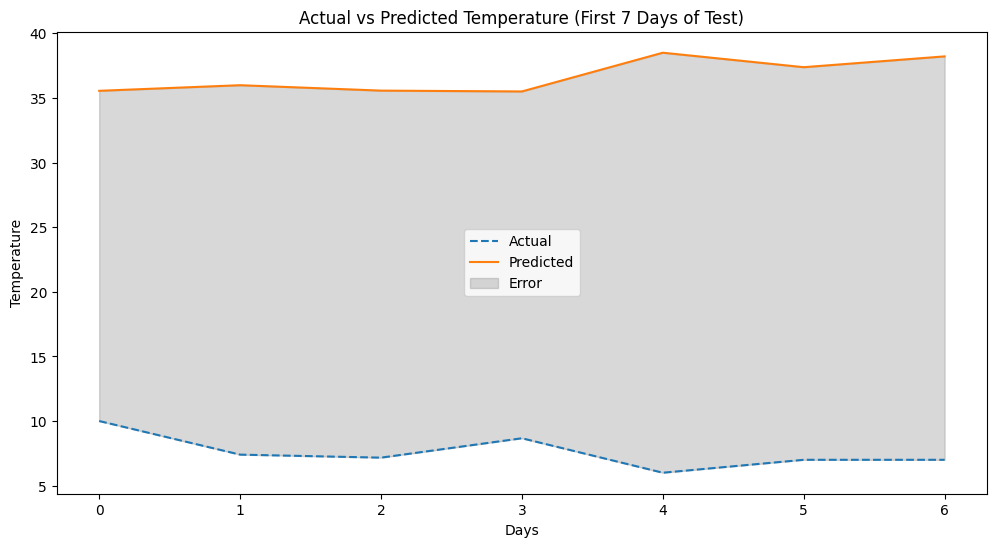

In [66]:
model.eval()
last_30_days = torch.tensor(train_values[-30:], dtype=torch.float32).unsqueeze(0)
with torch.no_grad():
    predictions = model(last_30_days).squeeze().numpy()

# 실제값 (온도만)
actuals = test_values[:7, 0]

# 예측값에서 온도만 선택
predictions_temp = predictions[:, 0]

# 차이 계산
error = actuals - predictions_temp

print(f"평균 에러: {error.mean()}")

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(range(7), actuals, label='Actual', linestyle='dashed')
plt.plot(range(7), predictions_temp, label='Predicted')
plt.fill_between(range(7), actuals, predictions_temp, color='gray', alpha=0.3, label='Error')
plt.title('Actual vs Predicted Temperature (First 7 Days of Test)')
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.legend()
plt.show()

👏 **수고 많았습니다! 다음 과제도 화이팅! 🚀**